In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("seeds_dataset.txt", sep = "\s+", header=None)
data.columns = ['A', 'C','P','L','W','AC','LK','Classes']
data.keys()
data.shape
X = data.iloc[:,0:7].values
y=data.iloc[:,7].values


### Ερώτημα 1 - Distance Matrix with euclidean and cosine metrics and plot
Αρχικά, χωρίσαμε τα δεδομένα του seeds_dataset στο διάνυσμα Χ για να περιέχει όλα τα δεδομένα πέραν των κλάσεων. 
Η ευκλείδια απόσταση είναι η απόσταση 2 σημείων στο χώρο, που υπολογίζεται από το πυθαγόρειο θεώρημα 
Η cosine απόσταση είναι το εσωτερικό γινόμενο των δύο διανυσμάτων στο χώρο.


In [3]:
from sklearn.metrics import pairwise_distances

In [4]:
euclidean_metrics = pairwise_distances(X,X,metric="euclidean")
print(euclidean_metrics)
print(euclidean_metrics.shape)  

[[0.         1.33357752 1.45343524 ... 6.56385255 4.10525057 4.80520091]
 [1.33357752 0.         1.86846948 ... 7.5510321  4.25991021 5.4535927 ]
 [1.45343524 1.86846948 0.         ... 5.74283431 2.81075033 3.65328627]
 ...
 [6.56385255 7.5510321  5.74283431 ... 0.         4.94612782 2.85502049]
 [4.10525057 4.25991021 2.81075033 ... 4.94612782 0.         2.10007516]
 [4.80520091 5.4535927  3.65328627 ... 2.85502049 2.10007516 0.        ]]
(210, 210)


Παραπάνω φαίνεται ο πίνακας αποστάσεων με ευκλείδιο υπολογισμό. Παρατηρούμε πως η κύρια διαγώνιος αποτελείται από μηδενικά στοιχεία κάτι το οποίο είναι αναμενόμενο καθώς στη κύρια διαγώνιο μετράται η απόσταση από το ίδιο σημείο.
Επίσης, παρατηρούμε πως πως σε κάποια σημεία του πίνακα οι αποστάσεις είναι μεγαλύτερες ενώ σε άλλα είναι μικρότερες.

In [5]:
cosine_metrics = pairwise_distances(X,X,metric="cosine")
print(cosine_metrics)


[[0.         0.00135054 0.00049319 ... 0.04146489 0.00647523 0.01806934]
 [0.00135054 0.         0.00314546 ... 0.05720533 0.01233612 0.02864703]
 [0.00049319 0.00314546 0.         ... 0.0338639  0.00435604 0.01337555]
 ...
 [0.04146489 0.05720533 0.0338639  ... 0.         0.02068525 0.0059483 ]
 [0.00647523 0.01233612 0.00435604 ... 0.02068525 0.         0.00449843]
 [0.01806934 0.02864703 0.01337555 ... 0.0059483  0.00449843 0.        ]]


Ομοίως, με ό,τι αναφέρθηκε παραπάνω ισχύει και για τον πίνακα αποστάσεων με cosine υπολογισμό. 

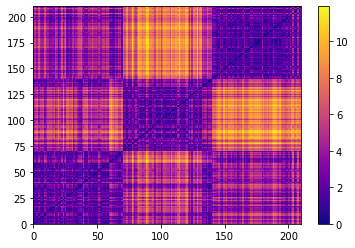

In [6]:
N = len(X)
plt.pcolormesh(euclidean_metrics,cmap="plasma")
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()



Με τη χρήση της εντολής pcolormesh εμφανίζεται το διάγραμμα του euclidean distance. 
Παρατηρούμε, πως όσο πιο έντονο χρώμα έχουν οι κλάσεις (άρα και μεγαλύτερη απόσταση)
τόσο πιο εύκολα μπορούν να διαχωριστούν σε κατηγορίες ενώ αντιθέτως αν είναι αρκετά 
κοντά (δηλαδή μικρές τιμές αποστάσεων) τότε είναι πιο δύσκολο να κατηγοροποιηθούν. 


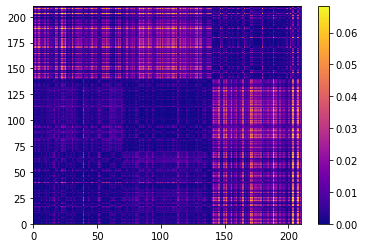

In [7]:
plt.pcolormesh(cosine_metrics,cmap="plasma")
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()


Ομοίως, κατασκευάζεται και το διάγραμμα για cosine μετρικές. Παρατηρούμε, πως καθώς το cosine χρησιμοποιεί άλλη τεχνική μέτρησης των αποστάσεων όπως αναφέρθηκε παραπάνω το διάγραμμα διαφέρει λίγο σε σχέση με το euclidean. 

Καταλήγουμε στο συμπέρασμα,για το διάγραμμα με Euclidean πως οι κλάσεις 2 και 3 είναι πιο εύκολα διαχωρίσιμες καθώς έχουν μεγαλύτερες αποστάσεις και έτσι η ταξινόμηση τους είναι ευκολότερη ενώ οι κλάσεις 1 και 3 είναι λιγότερο διαχωρίσημες καθώς έχουν μικρότερες αποστάσεις, δηλαδή τα δεδομένα τους ομοιάζουν ή και βρίσκονται πολύ κοντα μεταξύ τους κάτι που μπορεί να οδηγήσει σε εσφαλμένη ταξινόμηση και οι κλάσεις 1 και 2 βλέπουμε πως πάλι έχουν μικρότερη απόσταση οπότε ομοιάζουν παραπάνω.
Στο διάγραμμα με cosine οι κλάσεις 1 και 3 και 2 και 3 φαίνεται να είναι πιο εύκολα διαχωρίσιμες ενώ οι κλάσεις 1 με 2 βλέπου πως έχουν πολύ μικρή απόσταση και σχεδόν δεν είναι διακρίσιμες. Αυτο συμβαίνει καθώς το cosine δεν μπορεί να ξεχωρίσει καλά τα πολύ κοντινά σημεία.

### Ερώτημα 2 - Υπολογισμός Silhouette Coefficient για την ομαδοποίηση των 7-διαστάσεων δεδομένων σε k=2,3,..10 κλάσεις με τη μέθοδο k-means και Ευκλείδια ή squared Ευκλείδια μετρική.

Γενικά, ο αλγόριθμος k-means είναι ένας εύκολος machine learning αλγόριθμος χωρίς επίβλεψη μάθηση (unsupervised learning). Στην unsupervised μάθηση δίνουμε στον αλγόριθμο δεδομένα χωρίς ετικέτες για να δούμε τα συμπλέγματα (clusters) που θα δημιουργηθούν. Στην συσταδοποίηση με k-means πρακτικά σπάμε ένα σύνολο δεδομένων σε k συστάδες όπου κάθε σημείο θα ανήκει στην συστάδα που απέχει μικρότερη απόσταση. 
Για την αξιολόγηση του k-means υπάρχουν δύο μέθοδοι ο Elbow technique και με το Silhouette Coefficient. 
Ως Silhouette Coefficient ορίζεται για ένα σημείο ως s=1 - a/b για a<b , όπου a = μέση απόσταση του σημείου από όλα τα υπόλοιπα σημεία της κλάσης στην οποία ανήκει.
b = ελάχιστη μέση απόσταση του σημείου από όλες τις υπόλοιπες κλάσεις στις οποίες δεν ανήκει. Τυπικά το Silhouette Coefficient παίρνει τιμές από (0,1). Όσο πιο κοντά στο 1 ο συντελεστής τόσο πιο συμπαγές είναι το σημείο εντός της συστάδας που ανήκει και εξίσου μακρυά από τις υπόλοιπες συστάδες.


#### Διαγραμματική απεικόνιση του  Sihlouette Coefficient για διάφορες τιμές clusters. 
Πρακτικά, υπολογίζεται η μέση τιμή του sihlouette coefficient με την χρήση της εντολής silhouette_score για k=2,3,4..,10 το οποίο μας δείχνει την πυκνότητα και την διαχωρισιμότητα των συστάδων που δημιουργούνται. Στη συνέχεια υπολογίζεται το sihlouette score για κάθε δείγμα,γίνεται ταξινόμηση του και απεικονίζεται σε διάγραμμα. 
Συνεπώς, έχουμε 8 διαγράμματα που μας δείχνουν πως χωρίζονται τα δεδομένα, την πυκνότητα τους δηλαδή ανάλογα με το cluster που ανήκουν.

#### Με χρήση ευκλείδιας μετρικής

For n_clusters = 2 The average silhouette_score is : 0.5182873410849098
For n_clusters = 3 The average silhouette_score is : 0.4719337319126887
For n_clusters = 4 The average silhouette_score is : 0.3953600261389669
For n_clusters = 5 The average silhouette_score is : 0.3601705589625355
For n_clusters = 6 The average silhouette_score is : 0.36656450538673424
For n_clusters = 7 The average silhouette_score is : 0.3531111461157493
For n_clusters = 8 The average silhouette_score is : 0.3611916044665045
For n_clusters = 9 The average silhouette_score is : 0.3602415108117382
For n_clusters = 10 The average silhouette_score is : 0.34533775308878284


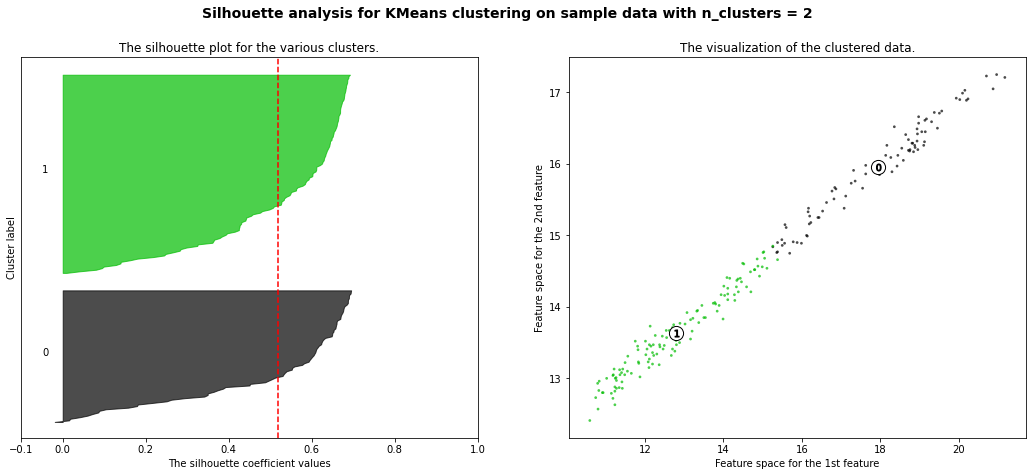

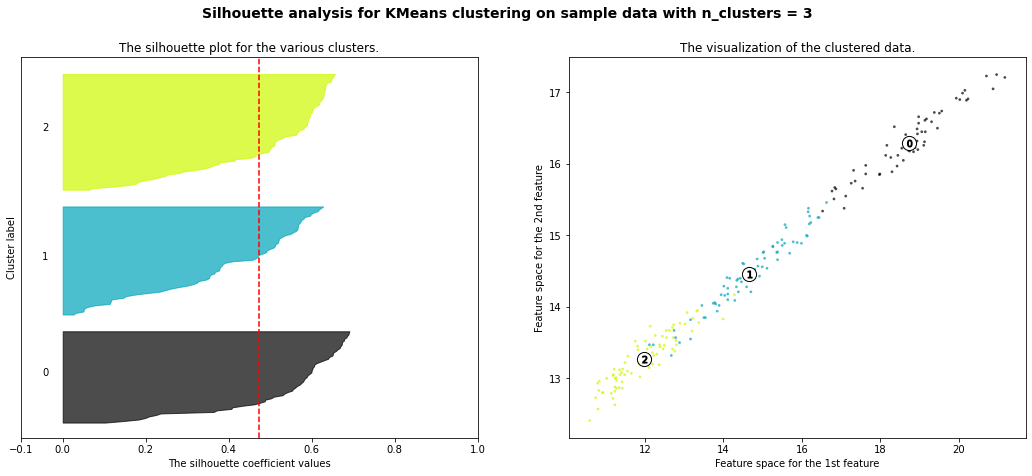

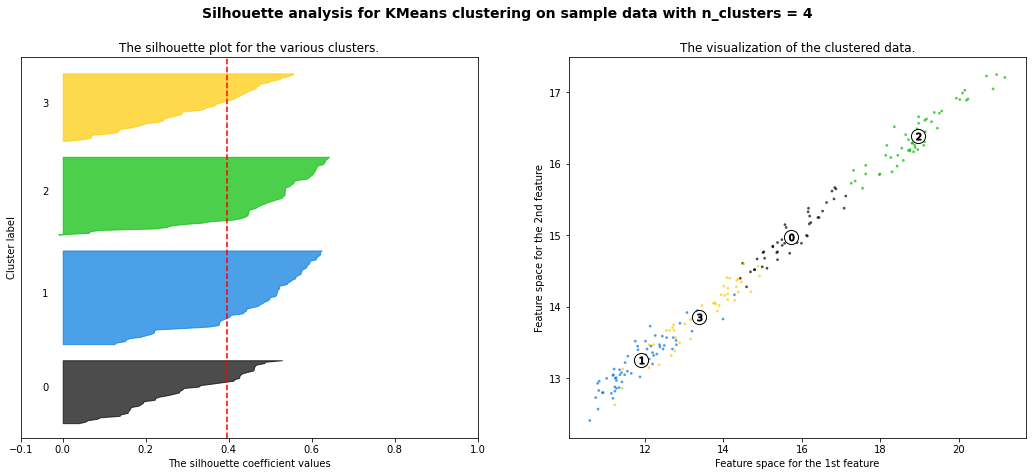

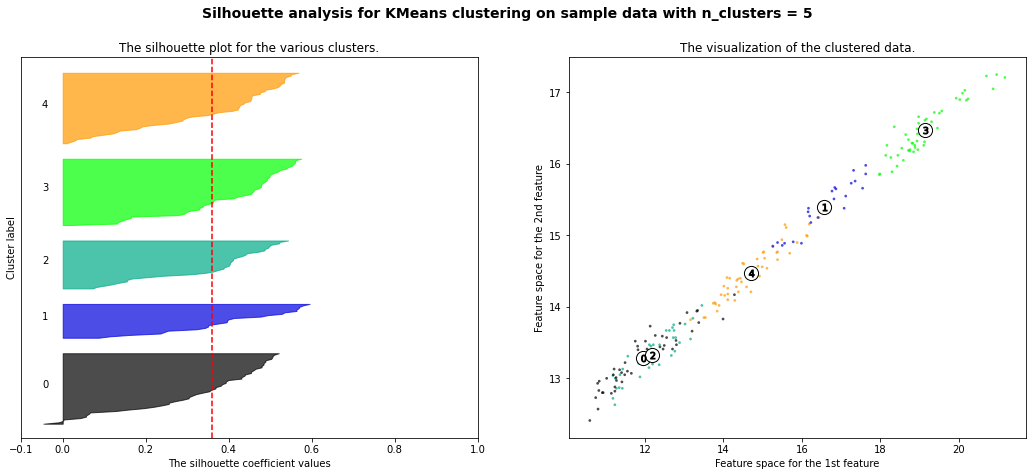

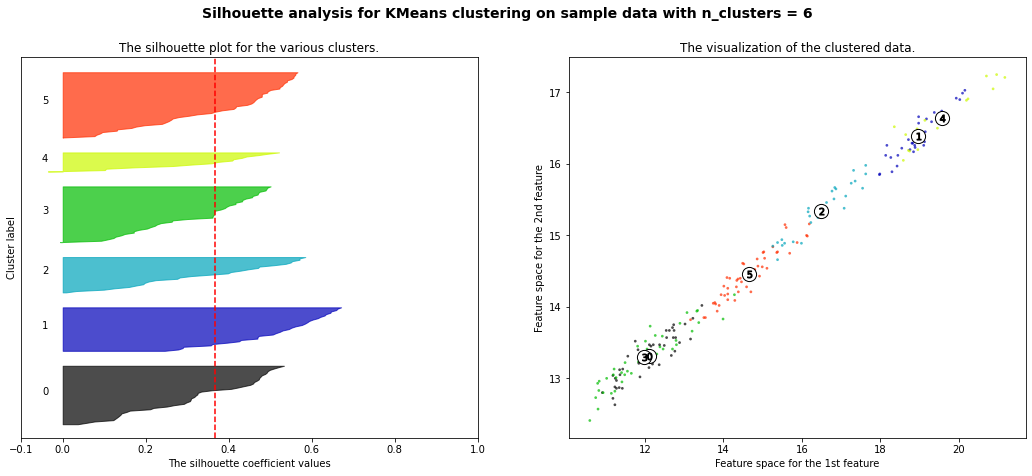

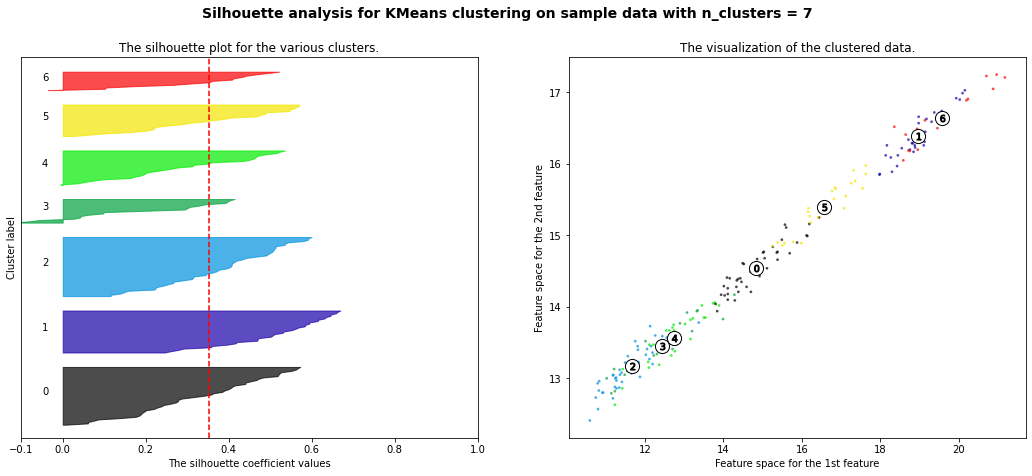

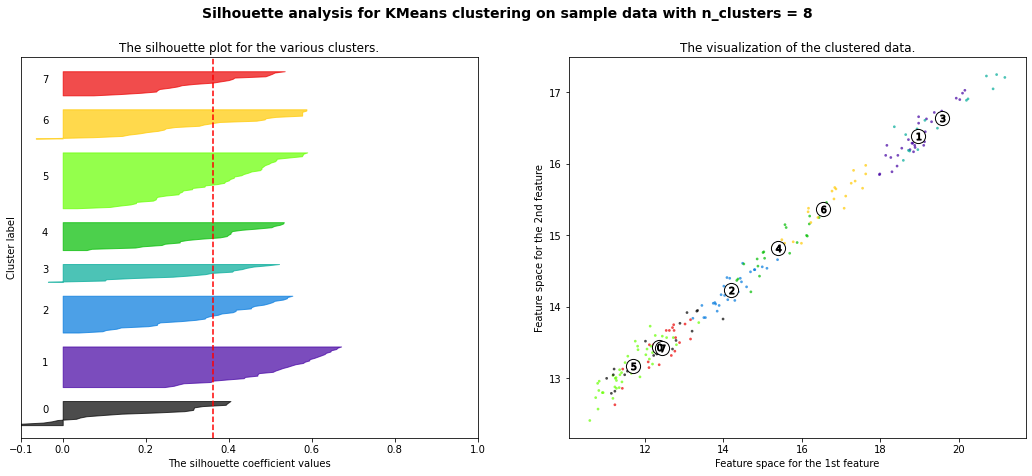

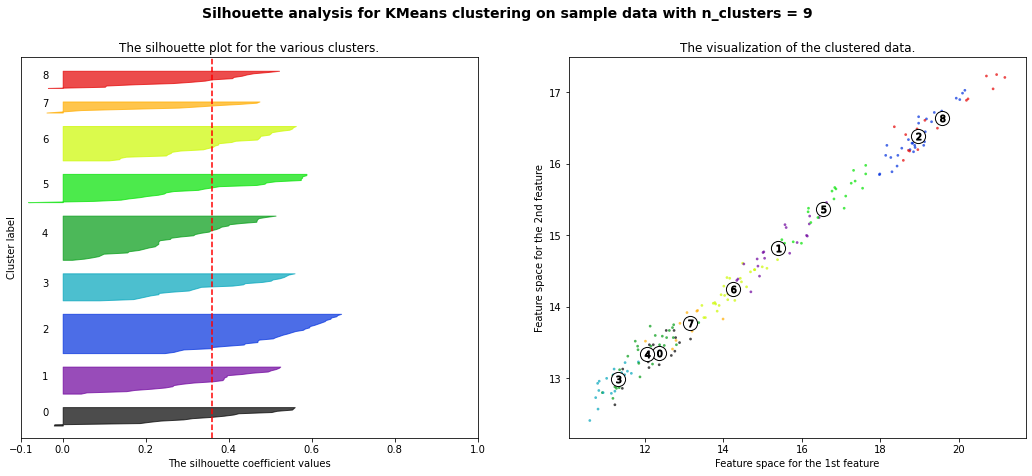

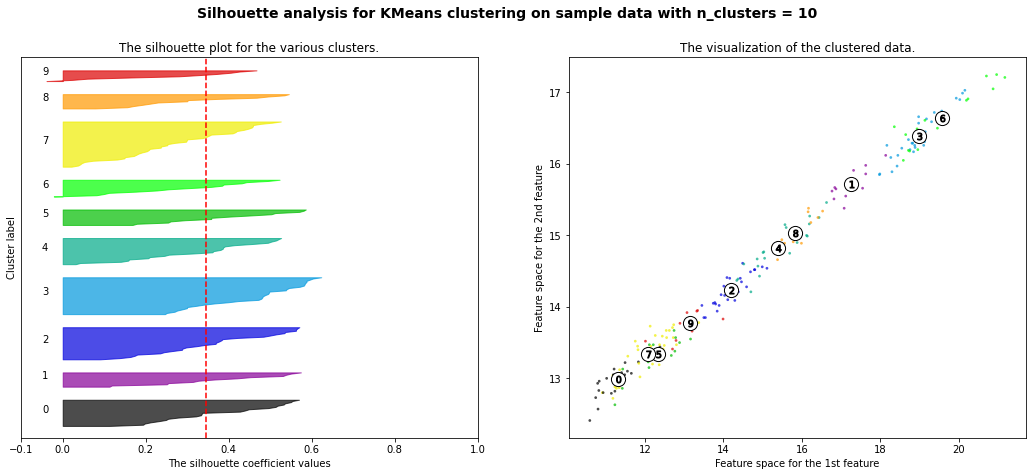

In [8]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score

#find the best sihlouette coefficient for kmeans in which k = 2,3..10
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from 0, 1 
    ax1.set_xlim([-0.1, 1])
    
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters 
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


#### Με χρήση squared Euclidean 

For n_clusters = 2 The average silhouette_score is : 0.5182873410849098
For n_clusters = 3 The average silhouette_score is : 0.4719337319126887
For n_clusters = 4 The average silhouette_score is : 0.3953600261389669
For n_clusters = 5 The average silhouette_score is : 0.3601705589625355
For n_clusters = 6 The average silhouette_score is : 0.36656450538673424
For n_clusters = 7 The average silhouette_score is : 0.3531111461157493
For n_clusters = 8 The average silhouette_score is : 0.3611916044665045
For n_clusters = 9 The average silhouette_score is : 0.3602415108117382
For n_clusters = 10 The average silhouette_score is : 0.34533775308878284


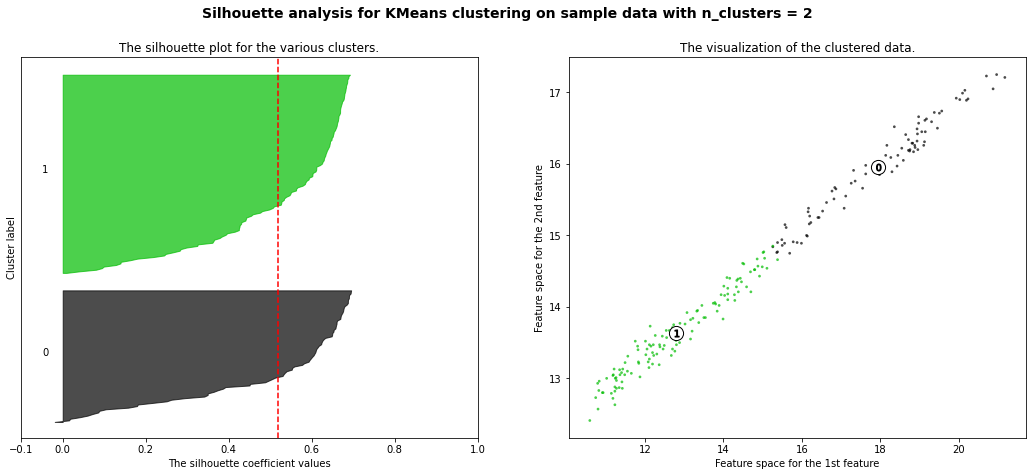

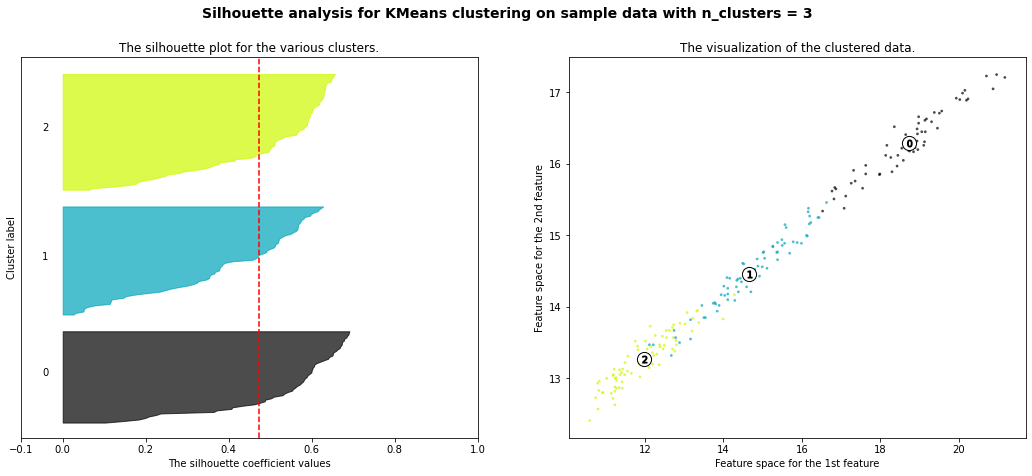

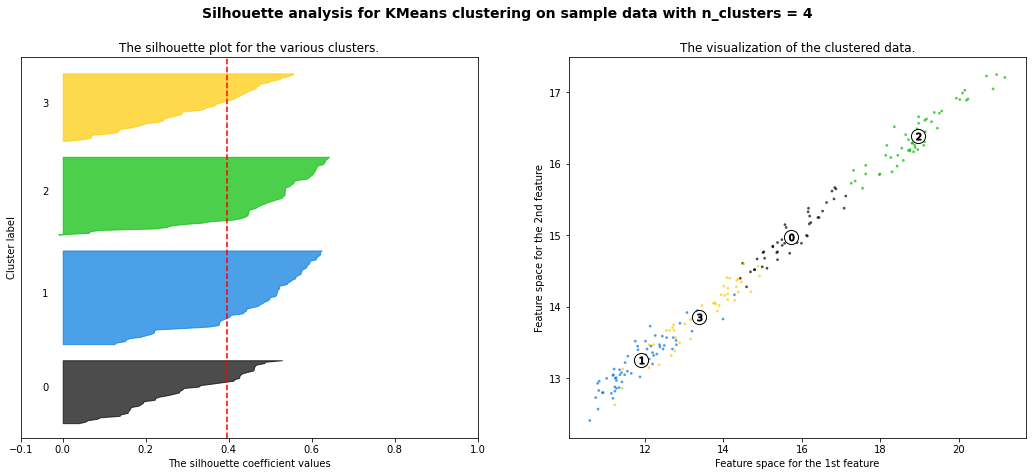

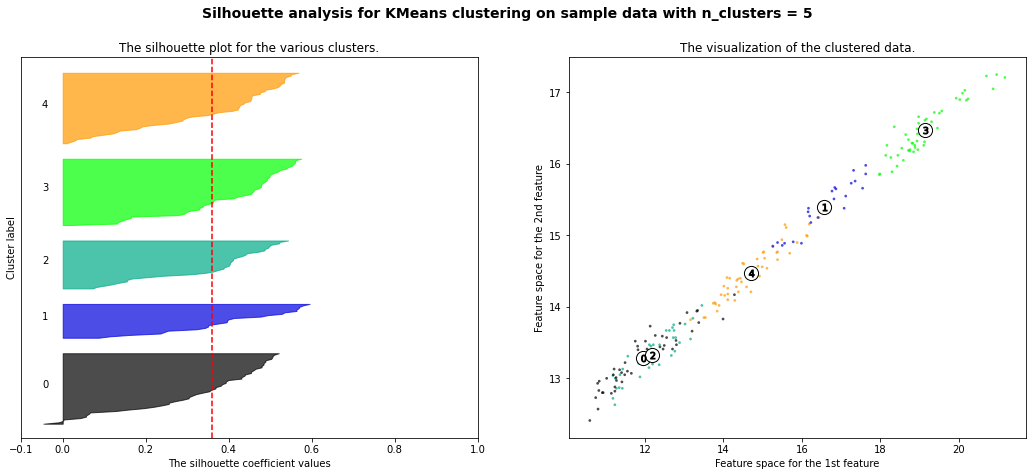

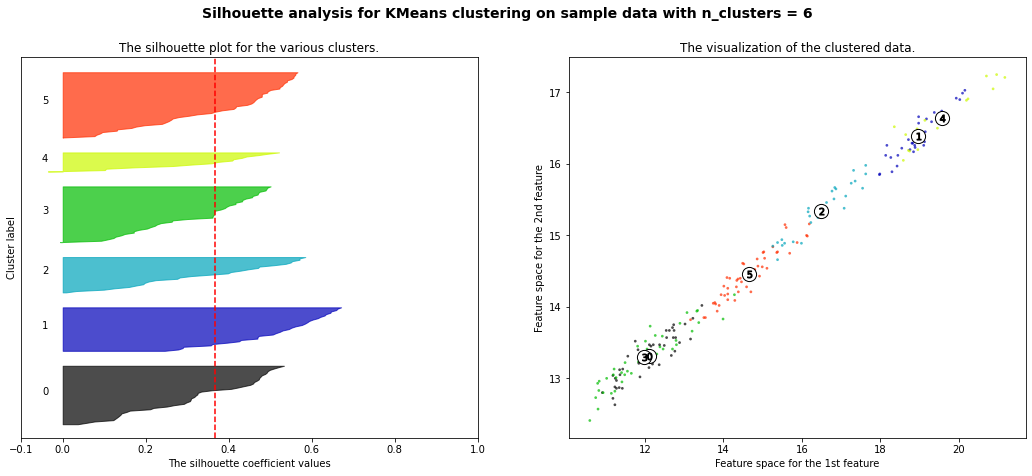

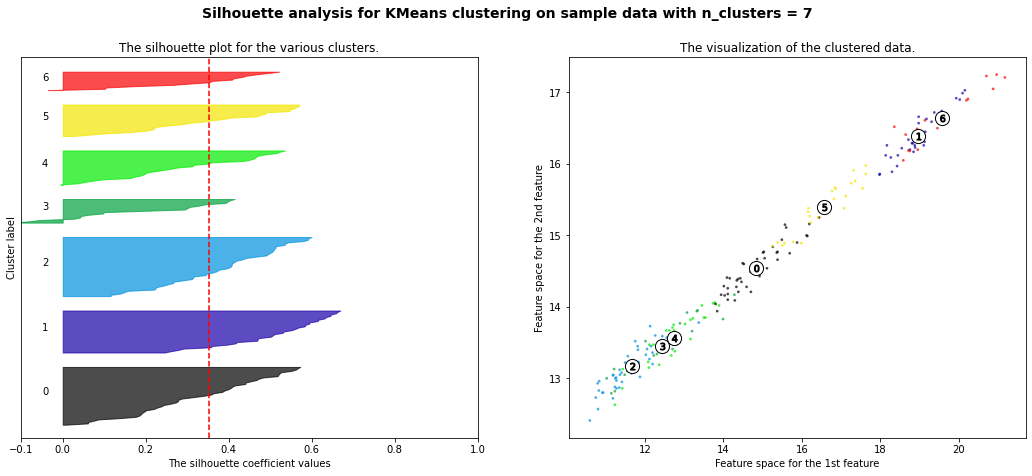

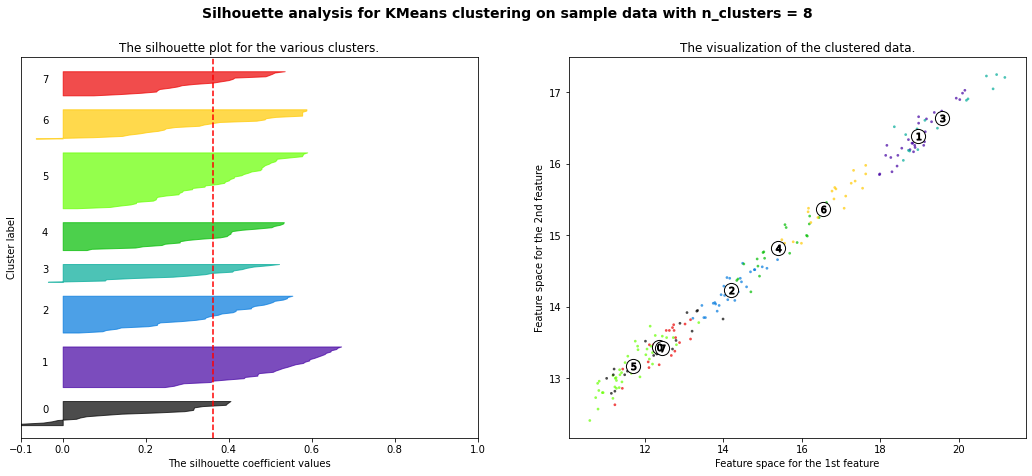

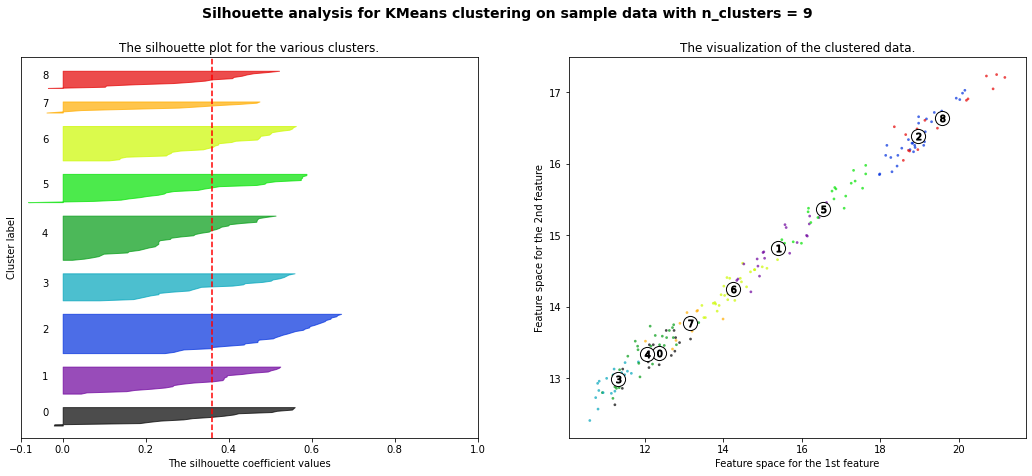

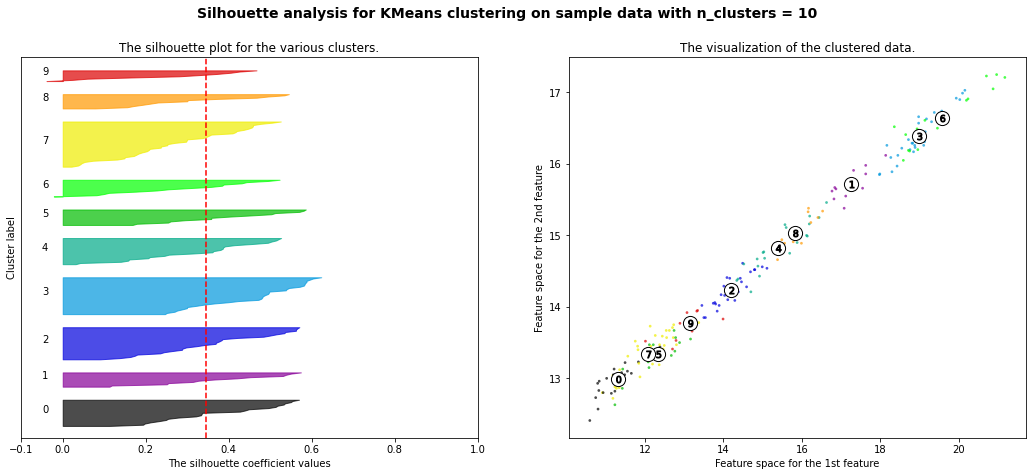

In [9]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score

#find the best sihlouette coefficient for kmeans in which k = 2,3..10
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels,metric='nan_euclidean')
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Συνολικό διάγραμμα sihlouette coefficient για k=2,3,...,10 για euclidean μετρική

Number Of Clusters:
2
Silhouette score value
0.5182873410849098
Number Of Clusters:
3
Silhouette score value
0.4719337319126887
Number Of Clusters:
4
Silhouette score value
0.3953600261389669
Number Of Clusters:
5
Silhouette score value
0.3613234083219364
Number Of Clusters:
6
Silhouette score value
0.3608393831646539
Number Of Clusters:
7
Silhouette score value
0.3531111461157493
Number Of Clusters:
8
Silhouette score value
0.3651029654300563
Number Of Clusters:
9
Silhouette score value
0.36260444763885696
Number Of Clusters:
10
Silhouette score value
0.35635325223927


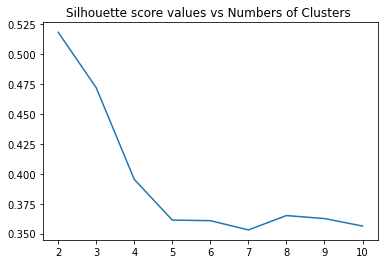

Optimal number of clusters is:
2


In [10]:
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
NumberOfClusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_score_values=list()
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None,copy_x=True)
    classifier.fit(X)
    labels= classifier.predict(X)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of clusters is:")
print(Optimal_NumberOf_Components)

#### Συνολικό διάγραμμα sihlouette coefficient για k=2,3,...,10 για euclidean μετρική

Number Of Clusters:
2
Silhouette score value
0.5182873410849098
Number Of Clusters:
3
Silhouette score value
0.4719337319126887
Number Of Clusters:
4
Silhouette score value
0.3953600261389669
Number Of Clusters:
5
Silhouette score value
0.3613234083219364
Number Of Clusters:
6
Silhouette score value
0.36866578093739266
Number Of Clusters:
7
Silhouette score value
0.35553746875157055
Number Of Clusters:
8
Silhouette score value
0.362074429185029
Number Of Clusters:
9
Silhouette score value
0.36343055812500447
Number Of Clusters:
10
Silhouette score value
0.3658554889372994


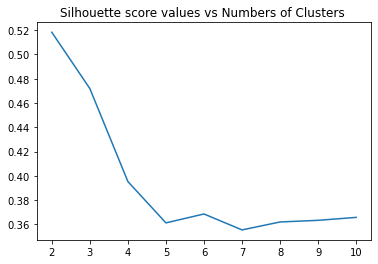

Optimal number of clusters is:
2


In [11]:
NumberOfClusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_score_values=list()
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=123, copy_x=True)
    classifier.fit(X)
    labels= classifier.predict(X)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='nan_euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of clusters is:")
print(Optimal_NumberOf_Components)

Οι παρατηρήσεις για τα παραπάνω διαγράμματα είναι πως οι δύο μετρικές euclidean και squared euclidean δίνουν σχεδόν πανομοιότυπα διαγράμματα καθώς και τιμές κάτι που οφείλεται στη γεωμετρία των δεδομένων που έχουμε.
Καταλήγουμε, πως ο βέλτιστος αριθμός συστάδων είναι 2 και στις δύο περιπτώσεις.

### Ερώτημα 2 - Κανονικοποίηση των δεδομένων ώστε κάθε χαρακτηριστικό να έχει μηδενική τιμή και μοναδιαία variance. Υπολογίσμος εκ νέου του Silhouette Coefficient για τα κανονικοποιημένα δεδομένα για cosine μετρική. Απεικόνιση του νέου διαγράμματος

Για την κανονικοποίηση των δεδομένων χρησιμοποιείται η StandardScaler με τις παραμέτρους with_mean,with_std ίσες με True ώστε να έχουμε μηδενική μέση τιμή και μοναδιαία τυπική απόκλιση. Παρακάτω, απεικονίζονται και οι 2 μέθοδοι που αναλύθηκαν στο ερώτημα 2 αλλά αυτή τη φορά για cosine μετρικές.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler  =StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)
import numpy as np
print(np.array(X_scaled).std())
print(np.array(X_scaled).mean())

1.0
-2.6584932290343884e-16


For n_clusters = 2 The average silhouette_score is : 0.6371610246247332
For n_clusters = 3 The average silhouette_score is : 0.570659316495954
For n_clusters = 4 The average silhouette_score is : 0.41581872986222695
For n_clusters = 5 The average silhouette_score is : 0.3555500796458332
For n_clusters = 6 The average silhouette_score is : 0.3001661554140685
For n_clusters = 7 The average silhouette_score is : 0.2654001155552511
For n_clusters = 8 The average silhouette_score is : 0.2324394660467506
For n_clusters = 9 The average silhouette_score is : 0.1661932309839973
For n_clusters = 10 The average silhouette_score is : 0.1908221209169903


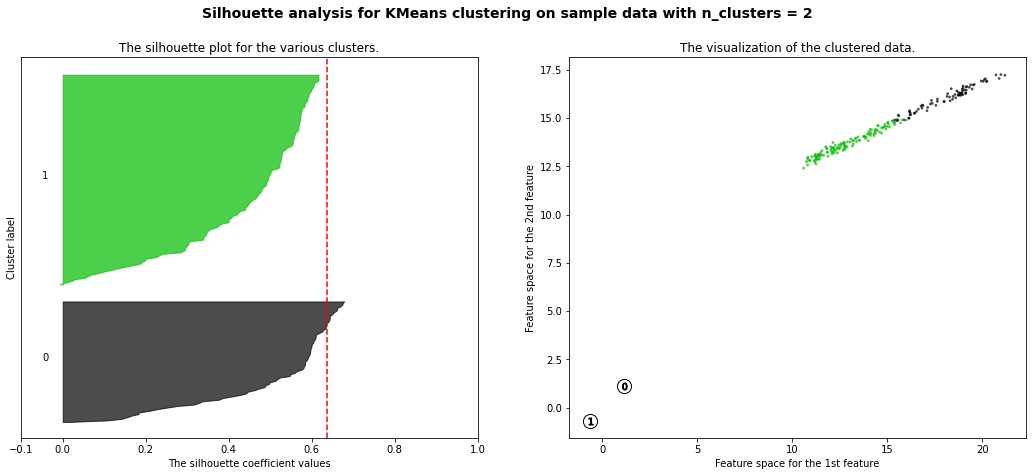

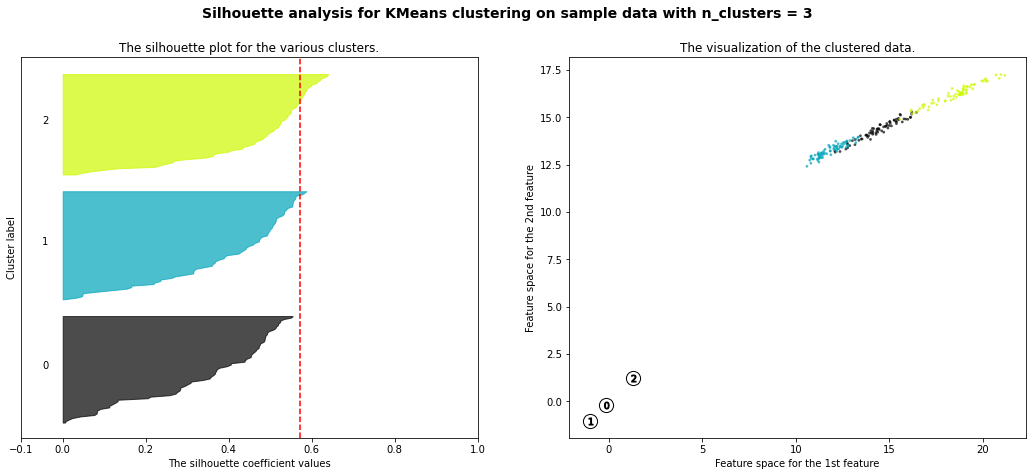

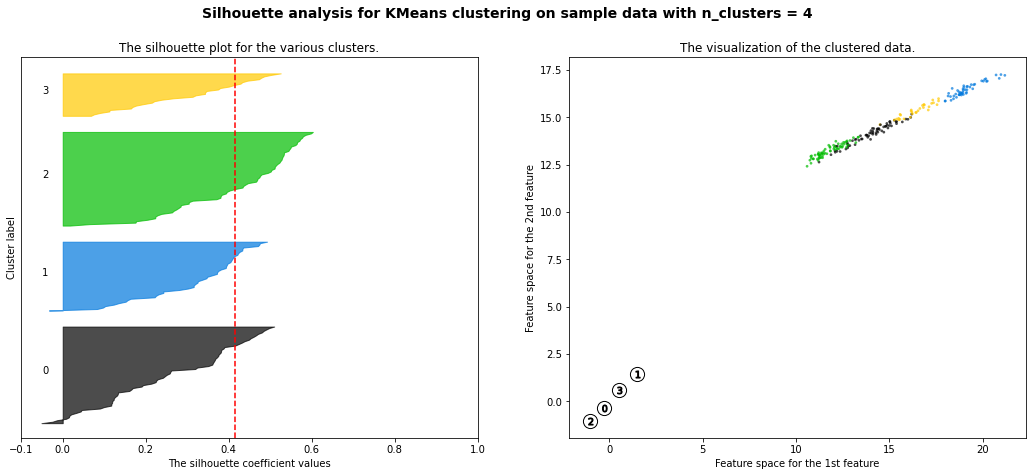

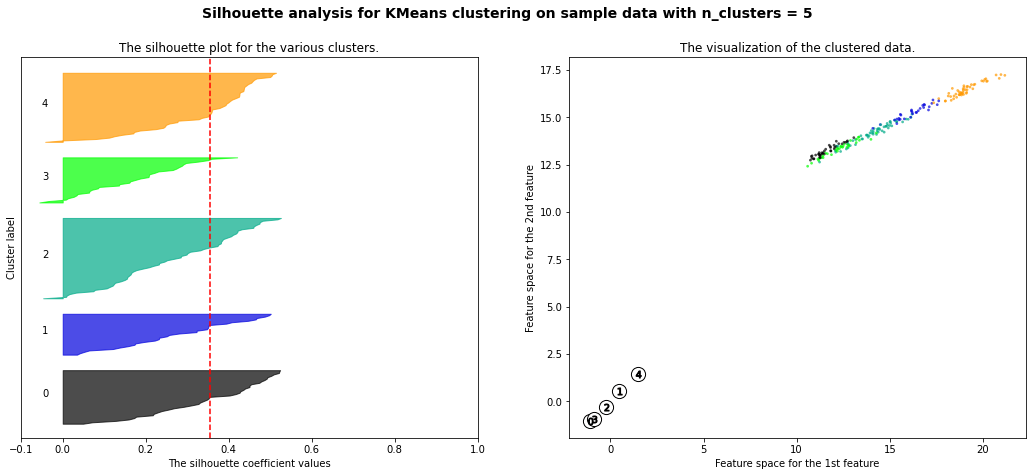

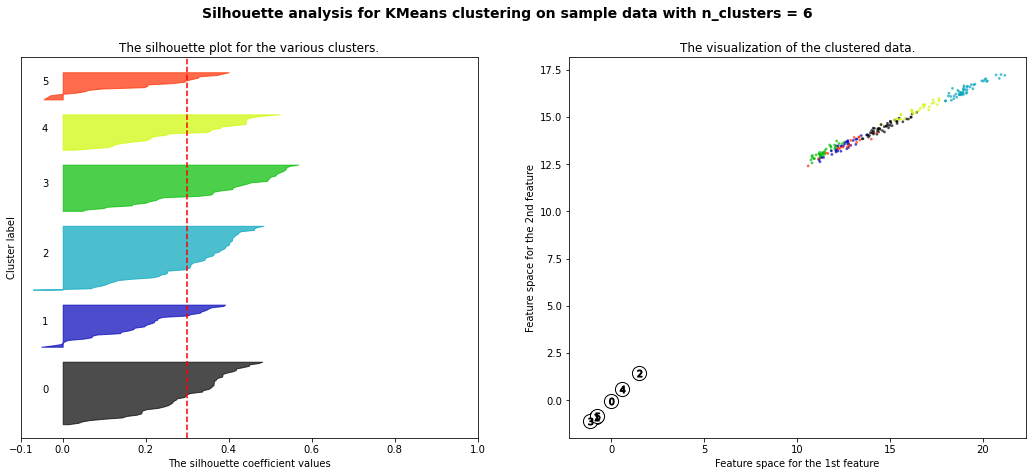

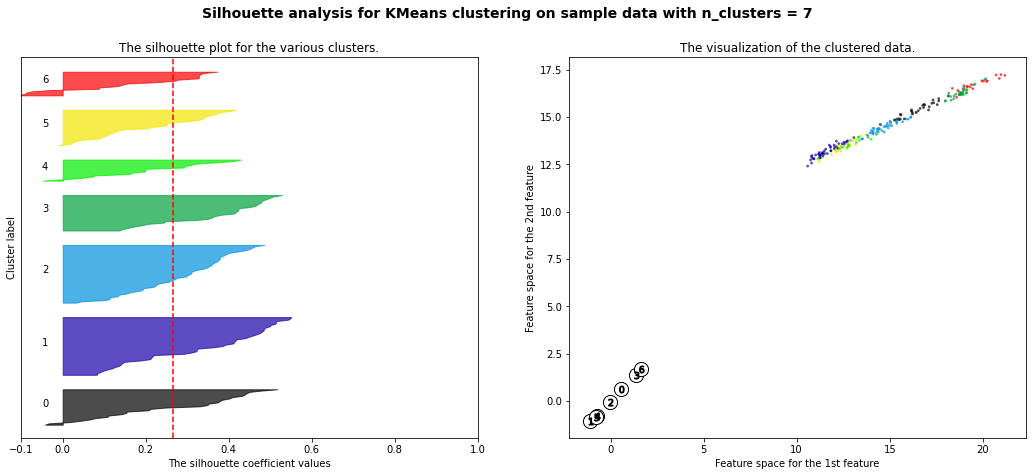

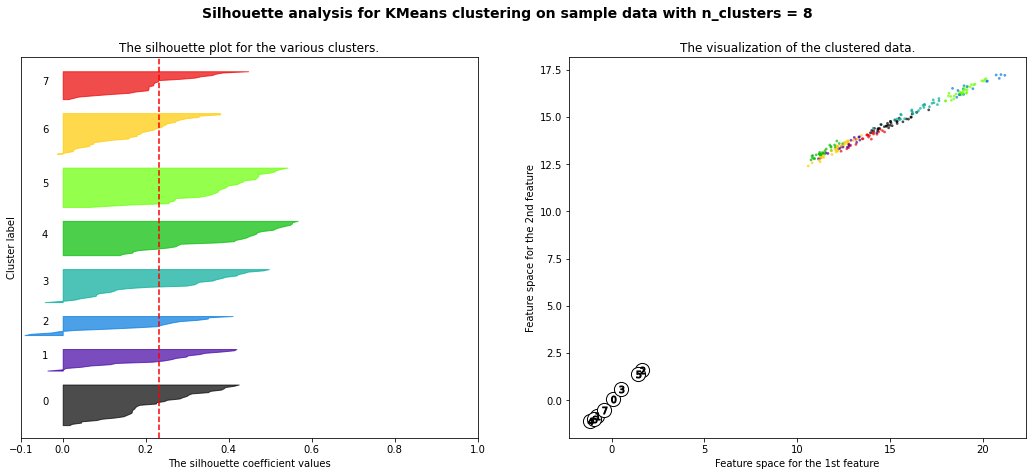

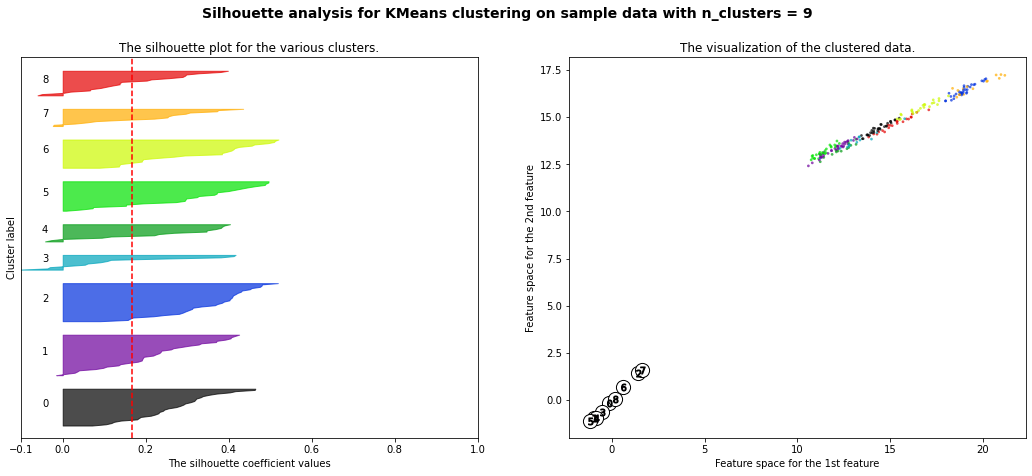

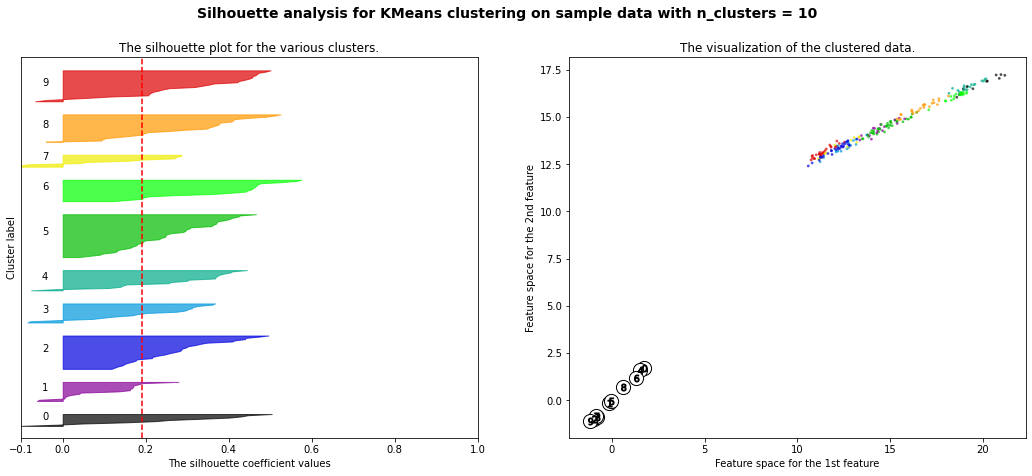

In [13]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score

#find the best sihlouette coefficient for kmeans in which k = 2,3..10
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels,metric='cosine')
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Number Of Clusters:
2
Silhouette score value
0.6371610246247332
Number Of Clusters:
3
Silhouette score value
0.570659316495954
Number Of Clusters:
4
Silhouette score value
0.47119510896812333
Number Of Clusters:
5
Silhouette score value
0.3471092678122057
Number Of Clusters:
6
Silhouette score value
0.3155208876612206
Number Of Clusters:
7
Silhouette score value
0.2809497889827317
Number Of Clusters:
8
Silhouette score value
0.18303259132926636
Number Of Clusters:
9
Silhouette score value
0.17876148119346807
Number Of Clusters:
10
Silhouette score value
0.20177029096546178


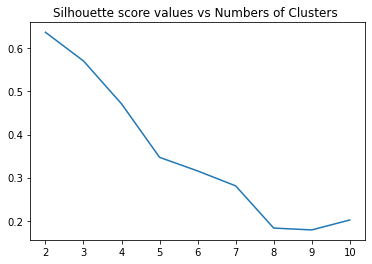

Optimal number of clusters is:
2


In [14]:
NumberOfClusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_score_values=list()
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(X_scaled)
    labels= classifier.predict(X_scaled)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(X_scaled,labels ,metric='cosine', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X_scaled,labels ,metric='cosine', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of clusters is:")
print(Optimal_NumberOf_Components)

Number Of Clusters:
2
Silhouette score value
0.3637822338863902
Number Of Clusters:
3
Silhouette score value
0.4532497405652893
Number Of Clusters:
4
Silhouette score value
0.3924233018196315
Number Of Clusters:
5
Silhouette score value
0.3540367194634185
Number Of Clusters:
6
Silhouette score value
0.3817613845800395
Number Of Clusters:
7
Silhouette score value
0.3542176672339123
Number Of Clusters:
8
Silhouette score value
0.4030613071941185
Number Of Clusters:
9
Silhouette score value
0.359696446851251
Number Of Clusters:
10
Silhouette score value
0.2666309921484335


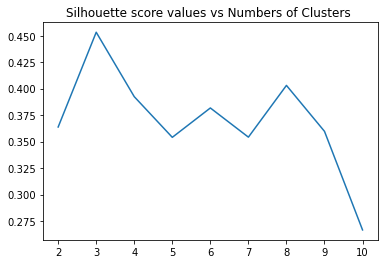

Optimal number of clusters is:
3


In [15]:
NumberOfClusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_score_values=list()
for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(X)
    labels= classifier.predict(X)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(X,labels ,metric='cosine', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='cosine', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of clusters is:")
print(Optimal_NumberOf_Components)

Παρατηρούμε, πως η αλλαγή της μετρικής σε cosine δεν αύξησε των βέλτιστο αριθμό των συστάδων από 2 που ήταν για ευκλείδια μετρική σε 3 συστάδες.
Παρόλα αυτά, αν χρησιμοποιήσουμε μετρική cosine στα δεδομένα χωρίς κανονικοποίηση παρατηρούμε πως ο αριθμός των συστάδων που δημιουργείται πλέον είναι 3 συστάδες.
Αυτό είναι πιθανό να οφείλεται στο γεγονός πως όταν τα δεδομένα δεν είναι κανονικοποιημένα, η γεωμετρία τους στον χώρο δεν επιτρέπει στην μετρική cosine να ξεχωρίσει τόσο εύκολα σε ποια κλάση ανήκουν τα δεδομένα. Δηλαδή, πολλά σημεία μη κανονικοποιημένα μπορεί να έχουν μικρή γωνία μεταξύ τους και με αυτό τον τρόπο να "δυσκολεύεται" ο αλγόριθμος kmeans να τα ξεχωρίσει.

### Ερώτημα 4 - Ομαδοποίηση των δεδομένων σε 3 συστάδες με την μέθοδο k-means και euclidean μετρική. Υπολογισμός του Rand Index για τη σύγκριση της παραγόμενης ομαδοποίησης με τις ετικέτες του dataset. Επανάληψη 5 φορές ( τυχαία αρχικοποίηση κέντρων) και υπολογισμός μέσης τιμής και variance. 

Για τον υπολογισμό του rand index (RI) χρησιμοποιήθηκε η εντολή rand_score. Επίσης, για λόγους σύγκρισης υπολογίστηκε και το adjusted_rand_score (ARI).
Ο λόγος rand index υπολογίζει το πόσο καλή είναι η ομαδοποίηση (clustering) που υπολογίστηκε από το kmeans και κυμαίνεται από 0 εώς 1, όπου 1 σημαίνει πως τα αποτελέσματα του clustering ταιριάζουν απόλυτα. 
Ο λόγος adjusted rand score πρακτικά διορθώνει τον λόγο καθώς η τυχαιοποίηση θα αναγκάσει κάποια δεδομένα να καταλάβουν τις ίδιες συστάδες. 


In [36]:
from sklearn.cluster import KMeans

y_true = data.iloc[:,7].values
clusterer = KMeans(n_clusters=3, init='k-means++',random_state=10)
cluster_labels = clusterer.fit_predict(X)
from sklearn.metrics.cluster import adjusted_rand_score

ARI = adjusted_rand_score(y_true,cluster_labels)
from sklearn.metrics.cluster import rand_score
RI = rand_score(y_true,cluster_labels)
print("The ARI is {r:1.3f}".format(r=round(ARI,4)))
print("The RI is {r:1.3f}".format(r=round(RI,4)))
sorted_array = np.sort(cluster_labels)
print(sorted_array[1:61])
print(sorted_array[61:133])
print(sorted_array[134:210])

The ARI is 0.717
The RI is 0.874
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Οι τιμές που λαμβάνονται είναι 0.874 για το RI και 0.717 για το ARI. Φαίνεται, πως ο αλγόριθμος ομαδοποίησε αρκετά καλά τα δεδομένα. Μία επισήμανση είναι πως ο λόγος ARI είναι πιο μικρός από τον RI καθώς όπως προαναφέρθηκε αφαιρεί την πιθανότητα δύο δεδομένα να ανήκουν στο ίδιο cluster.
Επίσης, να αναφερθεί ότι στον υπολογσιμό του Rand Index δεν παίζει ρόλο πως ο kmeans κάνει πρόβλεψη των 3 labels με τιμές 0,1,2 και τα πραγματικά labels 1,2,3 καθώς τον νοιάζει μόνο αν έγινε σωστά η ομαδοποίηση των δεδομένων και όχι οι τιμές των ετικετών.

Στη συνέχεια, επαναλαμβάνεται η τυχαιοποίηση των κεντρών (centroids) που υπολογίζει ο kmeans για 5 φορές και ο υπολογισμός της μέσης τιμής και της τυπικής απόκλισης του RI.

Για να πραγματοποιηθεί αυτό, ορίστηκε μία λίστα centroids με 5 τιμές και έγινε μία loop όπου η παράμετρος n_init που αφορά την τυχαιοποίηση των centroids έτρεχε για 5 φορές. Στη συνέχεια, μέσω μίας λίστας πάλι (list_ri) υπολογίζεται το Rand Index για τις διάφορες τιμές του τις 5 φορές που τρέχει ο αλγόριθμος και στη συνέχεια γίνεται print της μέσης τιμής και της τυπικής απόκλισης.


In [17]:
y_true_labels = data.iloc[:,7].values
centroids = [1,2,3,4,5]
list_ri = []
for i in centroids:
    clusterer = KMeans(n_clusters=3, init='k-means++',n_init = i,max_iter=300,random_state=None)
    n_init =i
    cluster_labels2 = clusterer.fit_predict(X)
    
#y_true = random.sample(y,210)
    RI = rand_score(y_true_labels,cluster_labels2)
    
    print(f"n_init:{i} , RI is:{RI}")
    #import numpy as np
    #print(f"n_init:{i} , std is:{np.array(ARI).std()}")
    #print(np.array(ARI).mean())
    list_ri.append(RI)
    print("The mean is {r:1.3f}".format(r=np.mean(list_ri)))
    #print(np.mean(list_ari))
    print("The std is {r:1.3f}".format(r=np.std(list_ri)))

n_init:1 , RI is:0.8743677375256322
The mean is 0.874
The std is 0.000
n_init:2 , RI is:0.8713602187286398
The mean is 0.873
The std is 0.002
n_init:3 , RI is:0.8743677375256322
The mean is 0.873
The std is 0.001
n_init:4 , RI is:0.8743677375256322
The mean is 0.874
The std is 0.001
n_init:5 , RI is:0.8743677375256322
The mean is 0.874
The std is 0.001


Παρατηρούμε, πως στην πρώτη επανάληψη, τα τυχαία κέντρα δίνουν λίγο χειρότερες τιμές από τις επόμενες επαναλήψεις. Η μέση τιμή μας δείχνει την κεντρική τάση, παρατηρούμε δηλαδή πως τα δεδομένα είναι αρκετά συγκεντρωμένα ενώ η τυπική απόκλιση μας δείχνει πόσο απέχουν από τη μέση τιμή. Άρα, μετά τις 5 επαναλήψεις παρατηρούμε πως έχει πολύ καλή τυπική απόκλιση ο αλγόριθμος καθώς συγκεντρώνεται κοντά στη μέση τιμή.

In [18]:
cosine_metrics = pairwise_distances(X,X,metric="cosine")

y_true_labels = data.iloc[:,7].values
centroids = [1,2,3,4,5]
list_ari = []
for i in centroids:
    clusterer = KMeans(n_clusters=3, init='k-means++',n_init = i,max_iter=300,random_state=None)
    n_init =i
    cluster_labels2 = clusterer.fit_predict(cosine_metrics)
    
#y_true = random.sample(y,210)
    ARI = adjusted_rand_score(y_true_labels,cluster_labels2)
    
    print(f"n_init:{i} , ARI is:{ARI}")
    #import numpy as np
    #print(f"n_init:{i} , std is:{np.array(ARI).std()}")
    #print(np.array(ARI).mean())
    list_ari.append(ARI)
    print("The mean is {r:1.3f}".format(r=np.mean(list_ari)))
    #print(np.mean(list_ari))
    print("The std is {r:1.3f}".format(r=np.std(list_ari)))

n_init:1 , ARI is:0.25145814612756284
The mean is 0.251
The std is 0.000
n_init:2 , ARI is:0.2234780669319529
The mean is 0.237
The std is 0.014
n_init:3 , ARI is:0.2668084976943378
The mean is 0.247
The std is 0.018
n_init:4 , ARI is:0.20521760599248678
The mean is 0.237
The std is 0.024
n_init:5 , ARI is:0.21911480613168507
The mean is 0.233
The std is 0.023


### Bonus:  Σχεδιασμός συστήματος που εκτελεί ταξινόμηση με βάση τη μέθοδο Nearest Neighbor χρησιμωποιώντας ένα πολύ μεγάλο σύνολο δεδομένων αναφοράς (εκπαίδευσης). Μπορείτε να σκεφτείτε έναν τρόπο να μειωθεί ο υπολογιστικός φόρτος κάθε νέας ταξινόμησης;

1.Το πρώτο βήμα που θα μπορούσε να γίνει για την μείωση του υπολογιστικού φόρτου είναι το standarization των δεδομένων, καθώς με αυτό το τρόπο οι τιμές δεν θα απέχουν πολύ μεταξύ τους.
2.Στη συνέχεια, θα ήταν καλύτερο, ειδικά αν έχουμε visualization των δεδομένων και των περιοχών απόφασης να διαλέξουμε έναν κατάλληλο αριθμό k γειτόνων και όχι να υπολογίζουμε τις αποστάσεις για ένα γείτονα κάθε φορα.
3.Εφαρμογή ιεραρχικής ομαδοποίησης για τον κατάλληλο καθορισμό των κέντρων.
4.Χρήση μετρικής είτε cosine είτε ευκλείδιας για την απόσταση.
5.Χρήση majority vote για την εύρεση των γειτόνων αντί για τον υπολογισμό όλων των αποστάσεων κάθε φορά.

Κάτι άλλο που θα μπορούσε να γίνει, είναι να χρησιμοποιηθεί ο mean-shift αλγόριθμος.Καθώς έχουμε πάρα πολλά δεδομένα μπορούμε να ορίσουμε τις αρχικές συστάδες και μετά να μεταφέρουμε τα κέντρα ανάλογα με την πυκνότητα έτσι θα χρειαστεί να κάνουμε λιγότερα βήματα. 
Επίσης, μπορούν να χρησιμοποιηθούν self-organizing maps που πρακτικά μειώνει τα high dimensions σε λιγότερα όπως 2-D ή 3-D.


Το ερώτημα 5 πραγματοποιήθηκε στο matlab

Χρησιμοποιήθηκε η εντολή Kmeans με 3 clusters και μετρική cosine. Στη συνέχεια έγινε επανάληψη του αλγορίθμου 5 φορές για τυχαία initial centroids και υπολογίστηκε για το καθένα το Rand Index.
Όλα τα RI, εισάχθηκαν σε έναν πίνακα για να βρεθεί η μέση τιμή και η τυπική απόκλιση τους. 
Η μέση τιμή υπολογίστηκε σε 0.7317 και η τυπική απόκλιση σε 0.0743.
Αυτό που παρατηρούμε είναι πως η cosine μετρική δίνει μεγαλύτερη τυπική απόκλιση αλλά μικρότερη μέση τιμή.
Η μετρική που αποδίδει καλύτερα είναι η ευκλείδια.
Αφού κάνουμε sorted τα predicted labels που υπολόγισε ο kmeans παρατηρούμε πως στο πρώτο iteration έχουμε το μικρότερο σφάλμα ομαδοποίησης για τις πραγματικές ετικέτες εφόσον προέβλεψε μόνο 9 παραπάνω για την κλάση 1, 3 λιγότερες για την κλάση 2 και 6 λιγότερες για την κλάση 3. 
Μετά από παρατήρηση των υπολοίπων predicted labels παρατηρούμε πως η κλάση που προσδιορίζει καλύτερα είναι η κλάση 2 και η κλάση 3.
Ομοίως, έγινε sort και των predicted labels με ευκλείδια μετρική και πάλι η κλάση 2 και η 3 είχαν καλύτερα αποτελέσματα σε σχέση με τις πραγματικές τους ετικέτες.

